In [1]:
import pandas as pd

In [2]:
import numpy as np

In [3]:
import matplotlib.pyplot as plt

In [4]:
import seaborn as sns

In [5]:
from importlib import resources

In [6]:
pip install openpyxl

Note: you may need to restart the kernel to use updated packages.


In [7]:
TD = pd.read_excel('Data_Train.xlsx')

In [8]:
TD.tail(4)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
10679,Air India,27/04/2019,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145
10680,Jet Airways,27/04/2019,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7229
10681,Vistara,01/03/2019,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648
10682,Air India,9/05/2019,Delhi,Cochin,DEL → GOI → BOM → COK,10:55,19:15,8h 20m,2 stops,No info,11753


In [9]:
TD.head(4)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218


In [10]:
TD.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [11]:
TD.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [12]:
TD['Total_Stops'].isnull()

0        False
1        False
2        False
3        False
4        False
         ...  
10678    False
10679    False
10680    False
10681    False
10682    False
Name: Total_Stops, Length: 10683, dtype: bool

In [13]:
TD[TD['Total_Stops'].isnull()]

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
9039,Air India,6/05/2019,Delhi,Cochin,NaN,09:45,09:25 07 May,23h 40m,NaN,No info,7480


In [14]:
TD['Route'].isnull()

0        False
1        False
2        False
3        False
4        False
         ...  
10678    False
10679    False
10680    False
10681    False
10682    False
Name: Route, Length: 10683, dtype: bool

In [15]:
TD[TD['Route'].isnull()]

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
9039,Air India,6/05/2019,Delhi,Cochin,NaN,09:45,09:25 07 May,23h 40m,NaN,No info,7480


In [16]:
TD.dropna(inplace = True)

In [17]:
TD.dtypes

Airline            object
Date_of_Journey    object
Source             object
Destination        object
Route              object
Dep_Time           object
Arrival_Time       object
Duration           object
Total_Stops        object
Additional_Info    object
Price               int64
dtype: object

In [18]:
data = TD.copy()

In [19]:
data.head(2)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662


In [20]:
def changeToDT(col):
    data[col] = pd.to_datetime(data[col])

In [21]:
import warnings
from warnings  import filterwarnings
filterwarnings("ignore")

In [22]:
data.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price'],
      dtype='object')

In [23]:
for feature in ['Dep_Time', 'Arrival_Time', 'Date_of_Journey']:
    changeToDT(feature)

In [24]:
data.dtypes

Airline                    object
Date_of_Journey    datetime64[ns]
Source                     object
Destination                object
Route                      object
Dep_Time           datetime64[ns]
Arrival_Time       datetime64[ns]
Duration                   object
Total_Stops                object
Additional_Info            object
Price                       int64
dtype: object

In [25]:
data.head(4)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2023-09-04 22:20:00,2023-03-22 01:10:00,2h 50m,non-stop,No info,3897
1,Air India,2019-05-01,Kolkata,Banglore,CCU → IXR → BBI → BLR,2023-09-04 05:50:00,2023-09-04 13:15:00,7h 25m,2 stops,No info,7662
2,Jet Airways,2019-06-09,Delhi,Cochin,DEL → LKO → BOM → COK,2023-09-04 09:25:00,2023-06-10 04:25:00,19h,2 stops,No info,13882
3,IndiGo,2019-05-12,Kolkata,Banglore,CCU → NAG → BLR,2023-09-04 18:05:00,2023-09-04 23:30:00,5h 25m,1 stop,No info,6218


In [26]:
data['Journey_Day'] = data['Date_of_Journey'].dt.day

In [27]:
data['Journey_Month'] = data['Date_of_Journey'].dt.month

In [28]:
data['Journey_Year'] = data['Date_of_Journey'].dt.year

In [29]:
data.head(4)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_Day,Journey_Month,Journey_Year
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2023-09-04 22:20:00,2023-03-22 01:10:00,2h 50m,non-stop,No info,3897,24,3,2019
1,Air India,2019-05-01,Kolkata,Banglore,CCU → IXR → BBI → BLR,2023-09-04 05:50:00,2023-09-04 13:15:00,7h 25m,2 stops,No info,7662,1,5,2019
2,Jet Airways,2019-06-09,Delhi,Cochin,DEL → LKO → BOM → COK,2023-09-04 09:25:00,2023-06-10 04:25:00,19h,2 stops,No info,13882,9,6,2019
3,IndiGo,2019-05-12,Kolkata,Banglore,CCU → NAG → BLR,2023-09-04 18:05:00,2023-09-04 23:30:00,5h 25m,1 stop,No info,6218,12,5,2019


In [30]:
def extHM(df, col):
    df[col+"_Hour"] = df[col].dt.hour
    df[col+"_Minute"] = df[col].dt.minute

In [31]:
extHM(data, 'Arrival_Time')

In [32]:
extHM(data,'Dep_Time')

In [33]:
data.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price', 'Journey_Day', 'Journey_Month',
       'Journey_Year', 'Arrival_Time_Hour', 'Arrival_Time_Minute',
       'Dep_Time_Hour', 'Dep_Time_Minute'],
      dtype='object')

In [34]:
data.head(4)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_Day,Journey_Month,Journey_Year,Arrival_Time_Hour,Arrival_Time_Minute,Dep_Time_Hour,Dep_Time_Minute
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2023-09-04 22:20:00,2023-03-22 01:10:00,2h 50m,non-stop,No info,3897,24,3,2019,1,10,22,20
1,Air India,2019-05-01,Kolkata,Banglore,CCU → IXR → BBI → BLR,2023-09-04 05:50:00,2023-09-04 13:15:00,7h 25m,2 stops,No info,7662,1,5,2019,13,15,5,50
2,Jet Airways,2019-06-09,Delhi,Cochin,DEL → LKO → BOM → COK,2023-09-04 09:25:00,2023-06-10 04:25:00,19h,2 stops,No info,13882,9,6,2019,4,25,9,25
3,IndiGo,2019-05-12,Kolkata,Banglore,CCU → NAG → BLR,2023-09-04 18:05:00,2023-09-04 23:30:00,5h 25m,1 stop,No info,6218,12,5,2019,23,30,18,5


In [35]:
col_Drop = ['Dep_Time', 'Arrival_Time']
data.drop(col_Drop, axis=1, inplace = True)

In [36]:
data.shape

(10682, 16)

In [37]:
data.head(4)

,Airline,Date_of_Journey,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_Day,Journey_Month,Journey_Year,Arrival_Time_Hour,Arrival_Time_Minute,Dep_Time_Hour,Dep_Time_Minute
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,2019,1,10,22,20
1,Air India,2019-05-01,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,5,2019,13,15,5,50
2,Jet Airways,2019-06-09,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2 stops,No info,13882,9,6,2019,4,25,9,25
3,IndiGo,2019-05-12,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,12,5,2019,23,30,18,5


In [38]:
def flightDepTimeHour(x):
    if (x>4) and (x<=8):
        return "Early Morning"
    elif (x>8) and (x<=12):
        return "Morning"
    elif (x>12) and (x<=16):
        return  "Afternoon"
    elif (x>16) and (x<=20):
        return  "Evening"
    elif (x>20) and (x<=24):
        return  "Night"
    else:
        return "Late Night"

In [39]:
data.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Duration', 'Total_Stops', 'Additional_Info', 'Price', 'Journey_Day',
       'Journey_Month', 'Journey_Year', 'Arrival_Time_Hour',
       'Arrival_Time_Minute', 'Dep_Time_Hour', 'Dep_Time_Minute'],
      dtype='object')

<Axes: xlabel='Dep_Time_Hour'>

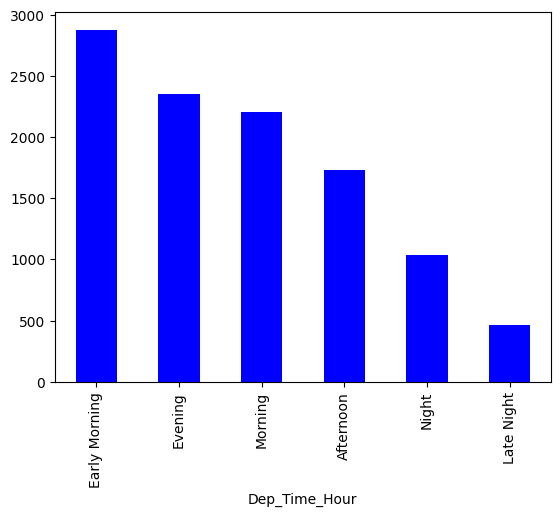

In [40]:
data['Dep_Time_Hour'].apply(flightDepTimeHour).value_counts().plot(kind = 'bar', color = 'b')

In [41]:
pip install plotly

Note: you may need to restart the kernel to use updated packages.


In [42]:
pip install chart_studio

Note: you may need to restart the kernel to use updated packages.


In [43]:
import plotly

In [44]:
pip install cufflinks

Note: you may need to restart the kernel to use updated packages.


In [45]:
import cufflinks as cf

In [46]:
from cufflinks.offline import go_offline

In [47]:
from plotly.offline import plot, iplot, init_notebook_mode, download_plotlyjs

In [48]:
init_notebook_mode(connected=True)
cf.go_offline()

In [49]:
data['Dep_Time_Hour'].apply(flightDepTimeHour).value_counts().iplot(kind = 'bar')

In [50]:
def ProcessDuration(x):
    if 'h' not in x:
        x = '0h' + " " + x
    elif 'm' not in x:
        x = x + " " + "0m"
    
    return x
        

In [51]:
data["Duration"] = data["Duration"].apply(ProcessDuration)

In [52]:
data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_Day,Journey_Month,Journey_Year,Arrival_Time_Hour,Arrival_Time_Minute,Dep_Time_Hour,Dep_Time_Minute
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,2019,1,10,22,20
1,Air India,2019-05-01,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,5,2019,13,15,5,50
2,Jet Airways,2019-06-09,Delhi,Cochin,DEL → LKO → BOM → COK,19h 0m,2 stops,No info,13882,9,6,2019,4,25,9,25
3,IndiGo,2019-05-12,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,12,5,2019,23,30,18,5
4,IndiGo,2019-03-01,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,1,3,2019,21,35,16,50


In [53]:
data["Duration"][0]

'2h 50m'

In [54]:
'2h 50m'.split()[0][0:-1]

'2'

In [55]:
int('2h 50m'.split()[0][0:-1])

2

In [56]:
int('2h 50m'.split()[1][0:-1])

50

In [57]:
data["Duration_Hours"] = data["Duration"].apply(lambda x: int(x.split()[0][0:-1]) )

In [58]:
data["Duration_Minutes"] = data["Duration"].apply(lambda x: int(x.split()[1][0:-1]) )

In [59]:
data

,Airline,Date_of_Journey,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_Day,Journey_Month,Journey_Year,Arrival_Time_Hour,Arrival_Time_Minute,Dep_Time_Hour,Dep_Time_Minute,Duration_Hours,Duration_Minutes
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,2019,1,10,22,20,2,50
1,Air India,2019-05-01,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,5,2019,13,15,5,50,7,25
2,Jet Airways,2019-06-09,Delhi,Cochin,DEL → LKO → BOM → COK,19h 0m,2 stops,No info,13882,9,6,2019,4,25,9,25,19,0
3,IndiGo,2019-05-12,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,12,5,2019,23,30,18,5,5,25
4,IndiGo,2019-03-01,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,1,3,2019,21,35,16,50,4,45
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,2019-04-09,Kolkata,Banglore,CCU → BLR,2h 30m,non-stop,No info,4107,9,4,2019,22,25,19,55,2,30
10679,Air India,2019-04-27,Kolkata,Banglore,CCU → BLR,2h 35m,non-stop,No info,4145,27,4,2019,23,20,20,45,2,35
10680,Jet Airways,2019-04-27,Banglore,Delhi,BLR → DEL,3h 0m,non-stop,No info,7229,27,4,2019,11,20,8,20,3,0
10681,Vistara,2019-03-01,Banglore,New Delhi,BLR → DEL,2h 40m,non-stop,No info,12648,1,3,2019,14,10,11,30,2,40


In [60]:

data["TotalDurationMinutes"] = data["Duration"].str.replace('h', '*60').str.replace(" ", '+').str.replace('m', '*1').apply(eval)

In [61]:
data.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Duration', 'Total_Stops', 'Additional_Info', 'Price', 'Journey_Day',
       'Journey_Month', 'Journey_Year', 'Arrival_Time_Hour',
       'Arrival_Time_Minute', 'Dep_Time_Hour', 'Dep_Time_Minute',
       'Duration_Hours', 'Duration_Minutes', 'TotalDurationMinutes'],
      dtype='object')

<Axes: xlabel='TotalDurationMinutes', ylabel='Price'>

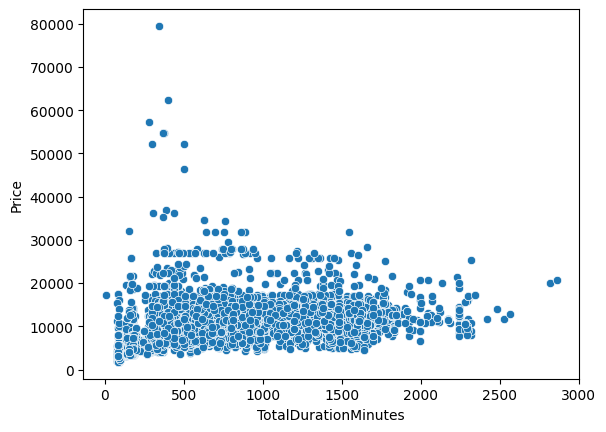

In [62]:
sns.scatterplot(x = 'TotalDurationMinutes', y = 'Price', data = data)

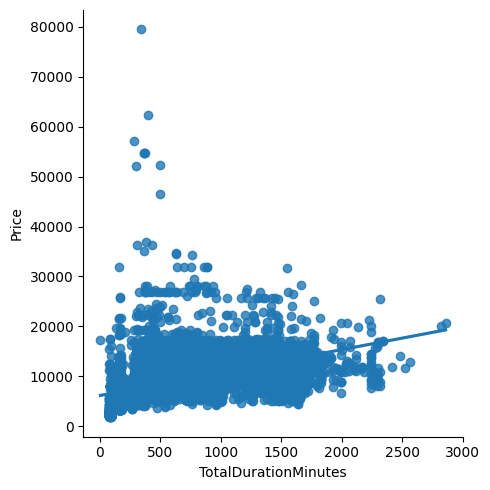

In [63]:
sns.lmplot(x ='TotalDurationMinutes', y ='Price', data = data)

<Axes: xlabel='TotalDurationMinutes', ylabel='Price'>

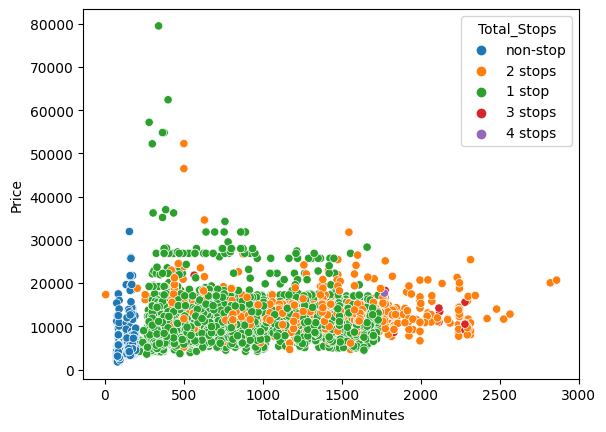

In [64]:
sns.scatterplot(x = 'TotalDurationMinutes', y = 'Price', hue = 'Total_Stops', data = data)

In [65]:
data.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Duration', 'Total_Stops', 'Additional_Info', 'Price', 'Journey_Day',
       'Journey_Month', 'Journey_Year', 'Arrival_Time_Hour',
       'Arrival_Time_Minute', 'Dep_Time_Hour', 'Dep_Time_Minute',
       'Duration_Hours', 'Duration_Minutes', 'TotalDurationMinutes'],
      dtype='object')

In [66]:
data[data["Airline"]=="Jet Airways"].groupby("Route").size().sort_values(ascending=False)

Route
CCU → BOM → BLR          930
DEL → BOM → COK          875
BLR → BOM → DEL          385
BLR → DEL                382
CCU → DEL → BLR          300
BOM → HYD                207
DEL → JAI → BOM → COK    207
DEL → AMD → BOM → COK    141
DEL → IDR → BOM → COK     86
DEL → NAG → BOM → COK     61
DEL → ATQ → BOM → COK     38
DEL → COK                 34
DEL → BHO → BOM → COK     29
DEL → BDQ → BOM → COK     28
DEL → LKO → BOM → COK     25
DEL → JDH → BOM → COK     23
CCU → GAU → BLR           22
DEL → MAA → BOM → COK     16
DEL → IXC → BOM → COK     13
BLR → MAA → DEL           10
BLR → BDQ → DEL            8
DEL → UDR → BOM → COK      7
BOM → DEL → HYD            5
CCU → BOM → PNQ → BLR      4
BLR → BOM → JDH → DEL      3
DEL → DED → BOM → COK      2
BOM → BDQ → DEL → HYD      2
DEL → CCU → BOM → COK      1
BOM → VNS → DEL → HYD      1
BOM → UDR → DEL → HYD      1
BOM → JDH → DEL → HYD      1
BOM → IDR → DEL → HYD      1
BOM → DED → DEL → HYD      1
dtype: int64

In [67]:
#AIRLINE VS PRICE ANALYSIS

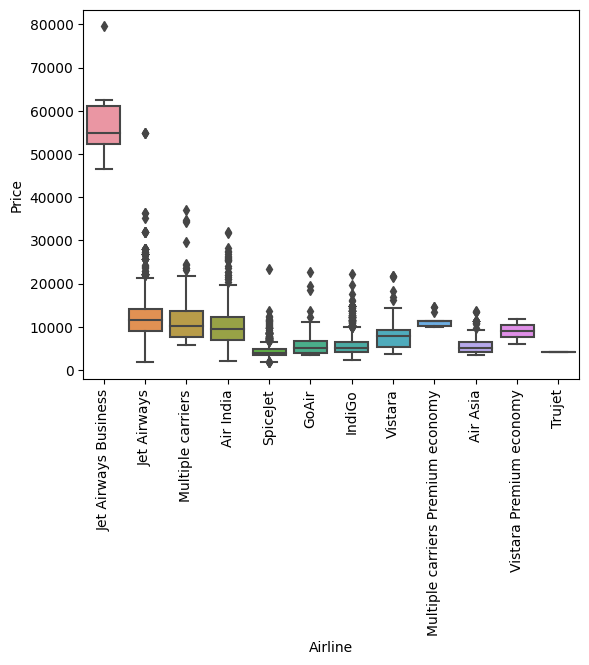

In [68]:
sns.boxplot(y='Price' , x='Airline' , data=data.sort_values('Price' , ascending=False))
plt.xticks(rotation="vertical")
plt.show()

In [69]:
#one hot encoding EXTRACT DESTINATION & SOURCE PALCES

In [70]:
cat_col = [col for col in data.columns if data[col].dtype=="object"]

In [71]:
num_col = [col for col in data.columns if data[col].dtype!="object"]

In [72]:
cat_col

['Airline',
 'Source',
 'Destination',
 'Route',
 'Duration',
 'Total_Stops',
 'Additional_Info']

In [73]:
num_col

['Date_of_Journey',
 'Price',
 'Journey_Day',
 'Journey_Month',
 'Journey_Year',
 'Arrival_Time_Hour',
 'Arrival_Time_Minute',
 'Dep_Time_Hour',
 'Dep_Time_Minute',
 'Duration_Hours',
 'Duration_Minutes',
 'TotalDurationMinutes']

In [74]:
data['Source'].unique()

array(['Banglore', 'Kolkata', 'Delhi', 'Chennai', 'Mumbai'], dtype=object)

In [75]:
data['Source'].apply(lambda x : 1 if x=='Delhi' else 0)

0        0
1        0
2        1
3        0
4        0
        ..
10678    0
10679    0
10680    0
10681    0
10682    1
Name: Source, Length: 10682, dtype: int64

In [76]:
for sub in data['Source'].unique():
   data['Source_'+sub] = data['Source'].apply(lambda x : 1 if x==sub else 0)
    

In [77]:
data.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Duration', 'Total_Stops', 'Additional_Info', 'Price', 'Journey_Day',
       'Journey_Month', 'Journey_Year', 'Arrival_Time_Hour',
       'Arrival_Time_Minute', 'Dep_Time_Hour', 'Dep_Time_Minute',
       'Duration_Hours', 'Duration_Minutes', 'TotalDurationMinutes',
       'Source_Banglore', 'Source_Kolkata', 'Source_Delhi', 'Source_Chennai',
       'Source_Mumbai'],
      dtype='object')

In [78]:
data.head

<bound method NDFrame.head of            Airline Date_of_Journey    Source Destination  \
0           IndiGo      2019-03-24  Banglore   New Delhi   
1        Air India      2019-05-01   Kolkata    Banglore   
2      Jet Airways      2019-06-09     Delhi      Cochin   
3           IndiGo      2019-05-12   Kolkata    Banglore   
4           IndiGo      2019-03-01  Banglore   New Delhi   
...            ...             ...       ...         ...   
10678     Air Asia      2019-04-09   Kolkata    Banglore   
10679    Air India      2019-04-27   Kolkata    Banglore   
10680  Jet Airways      2019-04-27  Banglore       Delhi   
10681      Vistara      2019-03-01  Banglore   New Delhi   
10682    Air India      2019-05-09     Delhi      Cochin   

                       Route Duration Total_Stops Additional_Info  Price  \
0                  BLR → DEL   2h 50m    non-stop         No info   3897   
1      CCU → IXR → BBI → BLR   7h 25m     2 stops         No info   7662   
2      DEL → LKO → BO

In [79]:
data.columns


Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Duration', 'Total_Stops', 'Additional_Info', 'Price', 'Journey_Day',
       'Journey_Month', 'Journey_Year', 'Arrival_Time_Hour',
       'Arrival_Time_Minute', 'Dep_Time_Hour', 'Dep_Time_Minute',
       'Duration_Hours', 'Duration_Minutes', 'TotalDurationMinutes',
       'Source_Banglore', 'Source_Kolkata', 'Source_Delhi', 'Source_Chennai',
       'Source_Mumbai'],
      dtype='object')

In [80]:
data.head(3)


,Airline,Date_of_Journey,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_Day,...,Dep_Time_Hour,Dep_Time_Minute,Duration_Hours,Duration_Minutes,TotalDurationMinutes,Source_Banglore,Source_Kolkata,Source_Delhi,Source_Chennai,Source_Mumbai
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,...,22,20,2,50,170,1,0,0,0,0
1,Air India,2019-05-01,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,...,5,50,7,25,445,0,1,0,0,0
2,Jet Airways,2019-06-09,Delhi,Cochin,DEL → LKO → BOM → COK,19h 0m,2 stops,No info,13882,9,...,9,25,19,0,1140,0,0,1,0,0


In [81]:
data['Airline'].nunique()

12

In [82]:
#TARGET GUIDED ENCODING

In [83]:
airlines = data.groupby(['Airline'])['Price'].mean().sort_values().index

In [84]:
airlines

Index(['Trujet', 'SpiceJet', 'Air Asia', 'IndiGo', 'GoAir', 'Vistara',
       'Vistara Premium economy', 'Air India', 'Multiple carriers',
       'Multiple carriers Premium economy', 'Jet Airways',
       'Jet Airways Business'],
      dtype='object', name='Airline')

In [85]:
dict_airlines = {key:index for index, key in enumerate(airlines, 0)}

In [86]:
dict_airlines

{'Trujet': 0,
 'SpiceJet': 1,
 'Air Asia': 2,
 'IndiGo': 3,
 'GoAir': 4,
 'Vistara': 5,
 'Vistara Premium economy': 6,
 'Air India': 7,
 'Multiple carriers': 8,
 'Multiple carriers Premium economy': 9,
 'Jet Airways': 10,
 'Jet Airways Business': 11}

In [87]:
data.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Duration', 'Total_Stops', 'Additional_Info', 'Price', 'Journey_Day',
       'Journey_Month', 'Journey_Year', 'Arrival_Time_Hour',
       'Arrival_Time_Minute', 'Dep_Time_Hour', 'Dep_Time_Minute',
       'Duration_Hours', 'Duration_Minutes', 'TotalDurationMinutes',
       'Source_Banglore', 'Source_Kolkata', 'Source_Delhi', 'Source_Chennai',
       'Source_Mumbai'],
      dtype='object')

In [88]:
data['Airline'] = data['Airline'].map(dict_airlines)

In [89]:
data['Airline']

0         3
1         7
2        10
3         3
4         3
         ..
10678     2
10679     7
10680    10
10681     5
10682     7
Name: Airline, Length: 10682, dtype: int64

In [90]:
data['Destination'].unique()

array(['New Delhi', 'Banglore', 'Cochin', 'Kolkata', 'Delhi', 'Hyderabad'],
      dtype=object)

In [91]:
data['Destination'].replace('New Delhi', 'Delhi', inplace=True)

In [92]:
data['Destination'].unique()

array(['Delhi', 'Banglore', 'Cochin', 'Kolkata', 'Hyderabad'],
      dtype=object)

In [93]:
data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_Day,...,Dep_Time_Hour,Dep_Time_Minute,Duration_Hours,Duration_Minutes,TotalDurationMinutes,Source_Banglore,Source_Kolkata,Source_Delhi,Source_Chennai,Source_Mumbai
0,3,2019-03-24,Banglore,Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,...,22,20,2,50,170,1,0,0,0,0
1,7,2019-05-01,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,...,5,50,7,25,445,0,1,0,0,0
2,10,2019-06-09,Delhi,Cochin,DEL → LKO → BOM → COK,19h 0m,2 stops,No info,13882,9,...,9,25,19,0,1140,0,0,1,0,0
3,3,2019-05-12,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,12,...,18,5,5,25,325,0,1,0,0,0
4,3,2019-03-01,Banglore,Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,1,...,16,50,4,45,285,1,0,0,0,0


In [94]:
for sub in data['Destination'].unique():
   data['Destination_'+sub] = data['Destination'].apply(lambda x : 1 if x==sub else 0)

In [95]:
data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_Day,...,Source_Banglore,Source_Kolkata,Source_Delhi,Source_Chennai,Source_Mumbai,Destination_Delhi,Destination_Banglore,Destination_Cochin,Destination_Kolkata,Destination_Hyderabad
0,3,2019-03-24,Banglore,Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,...,1,0,0,0,0,1,0,0,0,0
1,7,2019-05-01,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,...,0,1,0,0,0,0,1,0,0,0
2,10,2019-06-09,Delhi,Cochin,DEL → LKO → BOM → COK,19h 0m,2 stops,No info,13882,9,...,0,0,1,0,0,0,0,1,0,0
3,3,2019-05-12,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,12,...,0,1,0,0,0,0,1,0,0,0
4,3,2019-03-01,Banglore,Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,1,...,1,0,0,0,0,1,0,0,0,0


In [96]:
dest = data.groupby(['Destination'])['Price'].mean().sort_values().index

In [97]:
dest

Index(['Kolkata', 'Hyderabad', 'Delhi', 'Banglore', 'Cochin'], dtype='object', name='Destination')

In [98]:
dict_dest = {key:index for index, key in enumerate(dest, 0)}

In [99]:
dict_dest

{'Kolkata': 0, 'Hyderabad': 1, 'Delhi': 2, 'Banglore': 3, 'Cochin': 4}

In [100]:
data['Destination'] = data['Destination'].map(dict_dest)

In [101]:
data['Destination']

0        2
1        3
2        4
3        3
4        2
        ..
10678    3
10679    3
10680    2
10681    2
10682    4
Name: Destination, Length: 10682, dtype: int64

In [102]:
# MANUAL ENCODING WITHOUT SKLEARN

In [103]:
data['Total_Stops']

0        non-stop
1         2 stops
2         2 stops
3          1 stop
4          1 stop
           ...   
10678    non-stop
10679    non-stop
10680    non-stop
10681    non-stop
10682     2 stops
Name: Total_Stops, Length: 10682, dtype: object

In [104]:
data.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Duration', 'Total_Stops', 'Additional_Info', 'Price', 'Journey_Day',
       'Journey_Month', 'Journey_Year', 'Arrival_Time_Hour',
       'Arrival_Time_Minute', 'Dep_Time_Hour', 'Dep_Time_Minute',
       'Duration_Hours', 'Duration_Minutes', 'TotalDurationMinutes',
       'Source_Banglore', 'Source_Kolkata', 'Source_Delhi', 'Source_Chennai',
       'Source_Mumbai', 'Destination_Delhi', 'Destination_Banglore',
       'Destination_Cochin', 'Destination_Kolkata', 'Destination_Hyderabad'],
      dtype='object')

In [105]:
stop = {'non-stop':0, '2 stops':2, '1 stop':1, '3 stops':3, '4 stops':4}

In [106]:
data['Total_Stops'] = data["Total_Stops"].map(stop)

In [107]:
data['Total_Stops']

0        0
1        2
2        2
3        1
4        1
        ..
10678    0
10679    0
10680    0
10681    0
10682    2
Name: Total_Stops, Length: 10682, dtype: int64

In [108]:
data.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Duration', 'Total_Stops', 'Additional_Info', 'Price', 'Journey_Day',
       'Journey_Month', 'Journey_Year', 'Arrival_Time_Hour',
       'Arrival_Time_Minute', 'Dep_Time_Hour', 'Dep_Time_Minute',
       'Duration_Hours', 'Duration_Minutes', 'TotalDurationMinutes',
       'Source_Banglore', 'Source_Kolkata', 'Source_Delhi', 'Source_Chennai',
       'Source_Mumbai', 'Destination_Delhi', 'Destination_Banglore',
       'Destination_Cochin', 'Destination_Kolkata', 'Destination_Hyderabad'],
      dtype='object')

In [109]:
data['Additional_Info'].value_counts()/len(data)*100

Additional_Info
No info                         78.112713
In-flight meal not included     18.554578
No check-in baggage included     2.995694
1 Long layover                   0.177869
Change airports                  0.065531
Business class                   0.037446
No Info                          0.028085
1 Short layover                  0.009362
Red-eye flight                   0.009362
2 Long layover                   0.009362
Name: count, dtype: float64

In [110]:
data.reset_index(drop=True)

,Airline,Date_of_Journey,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_Day,...,Source_Banglore,Source_Kolkata,Source_Delhi,Source_Chennai,Source_Mumbai,Destination_Delhi,Destination_Banglore,Destination_Cochin,Destination_Kolkata,Destination_Hyderabad
0,3,2019-03-24,Banglore,2,BLR → DEL,2h 50m,0,No info,3897,24,...,1,0,0,0,0,1,0,0,0,0
1,7,2019-05-01,Kolkata,3,CCU → IXR → BBI → BLR,7h 25m,2,No info,7662,1,...,0,1,0,0,0,0,1,0,0,0
2,10,2019-06-09,Delhi,4,DEL → LKO → BOM → COK,19h 0m,2,No info,13882,9,...,0,0,1,0,0,0,0,1,0,0
3,3,2019-05-12,Kolkata,3,CCU → NAG → BLR,5h 25m,1,No info,6218,12,...,0,1,0,0,0,0,1,0,0,0
4,3,2019-03-01,Banglore,2,BLR → NAG → DEL,4h 45m,1,No info,13302,1,...,1,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10677,2,2019-04-09,Kolkata,3,CCU → BLR,2h 30m,0,No info,4107,9,...,0,1,0,0,0,0,1,0,0,0
10678,7,2019-04-27,Kolkata,3,CCU → BLR,2h 35m,0,No info,4145,27,...,0,1,0,0,0,0,1,0,0,0
10679,10,2019-04-27,Banglore,2,BLR → DEL,3h 0m,0,No info,7229,27,...,1,0,0,0,0,1,0,0,0,0
10680,5,2019-03-01,Banglore,2,BLR → DEL,2h 40m,0,No info,12648,1,...,1,0,0,0,0,1,0,0,0,0


In [111]:
data.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Duration', 'Total_Stops', 'Additional_Info', 'Price', 'Journey_Day',
       'Journey_Month', 'Journey_Year', 'Arrival_Time_Hour',
       'Arrival_Time_Minute', 'Dep_Time_Hour', 'Dep_Time_Minute',
       'Duration_Hours', 'Duration_Minutes', 'TotalDurationMinutes',
       'Source_Banglore', 'Source_Kolkata', 'Source_Delhi', 'Source_Chennai',
       'Source_Mumbai', 'Destination_Delhi', 'Destination_Banglore',
       'Destination_Cochin', 'Destination_Kolkata', 'Destination_Hyderabad'],
      dtype='object')

In [112]:
data.drop(columns=['Date_of_Journey', 'Additional_Info', 'TotalDurationMinutes', 'Source', 'Journey_Year'], axis = 1, inplace =True)

In [113]:
data.drop(columns = ['Route','Duration'] , axis = 1, inplace =True)

In [114]:
data.head()

,Airline,Destination,Total_Stops,Price,Journey_Day,Journey_Month,Arrival_Time_Hour,Arrival_Time_Minute,Dep_Time_Hour,Dep_Time_Minute,...,Source_Banglore,Source_Kolkata,Source_Delhi,Source_Chennai,Source_Mumbai,Destination_Delhi,Destination_Banglore,Destination_Cochin,Destination_Kolkata,Destination_Hyderabad
0,3,2,0,3897,24,3,1,10,22,20,...,1,0,0,0,0,1,0,0,0,0
1,7,3,2,7662,1,5,13,15,5,50,...,0,1,0,0,0,0,1,0,0,0
2,10,4,2,13882,9,6,4,25,9,25,...,0,0,1,0,0,0,0,1,0,0
3,3,3,1,6218,12,5,23,30,18,5,...,0,1,0,0,0,0,1,0,0,0
4,3,2,1,13302,1,3,21,35,16,50,...,1,0,0,0,0,1,0,0,0,0


In [115]:
# OUTLIER DETECTION

In [116]:
def plot(df, col):
    fig , (ax1, ax2, ax3) = plt.subplots(3,1)

    sns.distplot(df[col], ax=ax1)
    sns.boxplot(df[col], ax=ax2)
    sns.distplot(df[col], ax=ax3, kde=False)

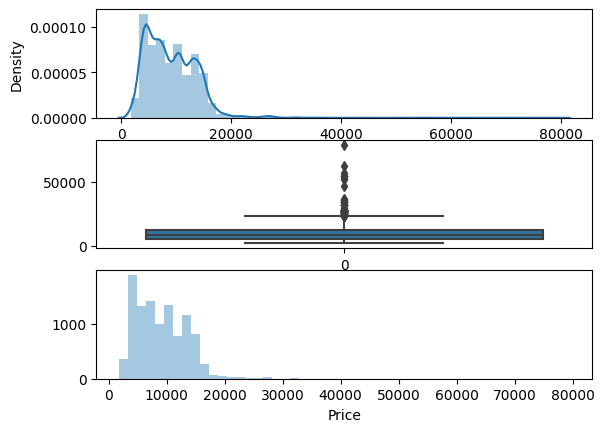

In [117]:
plot(data, 'Price')

In [118]:
q1 = data['Price'].quantile(0.25)
q3 = data['Price'].quantile(0.75)
iqr = q3 - q1

maximum = q3 +1.5*iqr
minimum = q1 - 1.5*iqr

In [119]:
print(maximum)

23017.0


In [120]:
print(minimum)

-5367.0


In [121]:
print([price for price in data['Price'] if price>maximum or price<minimum])

[27430, 36983, 26890, 26890, 25139, 27210, 52229, 26743, 26890, 25735, 27992, 26890, 26890, 23583, 26890, 23533, 24115, 25735, 54826, 31783, 27992, 26890, 26890, 25430, 36235, 27210, 26890, 25735, 54826, 26890, 35185, 79512, 28097, 27992, 26890, 25735, 26092, 31825, 25913, 25735, 27992, 31825, 23267, 62427, 54826, 31825, 25430, 26890, 36235, 23843, 26890, 25735, 28322, 25735, 25735, 31825, 26890, 27992, 34273, 46490, 29528, 26890, 26890, 26890, 34503, 26890, 27992, 26890, 26890, 23170, 24528, 26890, 27992, 25735, 34608, 25703, 26890, 23528, 31825, 27282, 25735, 27992, 52285, 24017, 31945, 26890, 24318, 23677, 27992, 24210, 57209, 26890, 31825, 26480]


In [122]:
len([price for price in data['Price'] if price>maximum or price<minimum])

94

In [123]:
data['Price'] = np.where(data['Price']>35000, data['Price'].median(),  data['Price']) 

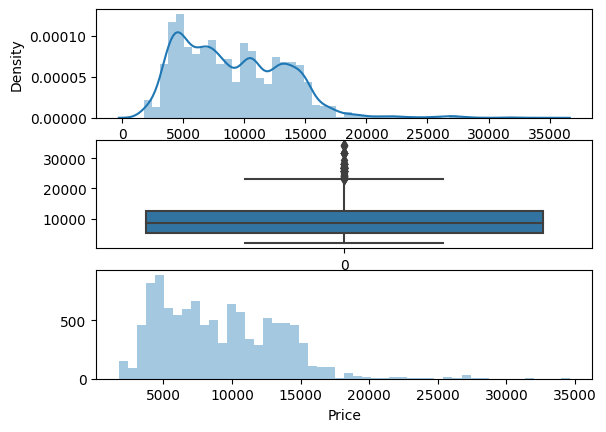

In [124]:
plot(data, 'Price')

In [125]:
# FEATURE SELECTION - mutual info approach

In [126]:
pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [127]:
pip install sklearn

Note: you may need to restart the kernel to use updated packages.


In [128]:
X = data.drop(['Price'], axis=1)

In [129]:
y = data['Price']

In [130]:
from sklearn.feature_selection import mutual_info_regression

In [131]:
 imp = mutual_info_regression(X, y)

In [132]:
imp

array([0.97558562, 1.00460218, 0.78938823, 0.22733291, 0.62625254,
       0.40000035, 0.35414533, 0.33141426, 0.26788194, 0.47345656,
       0.33977294, 0.39550056, 0.44806938, 0.51585521, 0.14172732,
       0.20770684, 0.39570191, 0.45533984, 0.524217  , 0.13408206,
       0.19043622])

In [133]:
imp_df = pd.DataFrame(imp, index=X.columns)

In [134]:
imp_df.columns = ["Importance"]

In [135]:
imp_df

,Importance
Airline,0.975586
Destination,1.004602
Total_Stops,0.789388
Journey_Day,0.227333
Journey_Month,0.626253
Arrival_Time_Hour,0.400000
Arrival_Time_Minute,0.354145
Dep_Time_Hour,0.331414
Dep_Time_Minute,0.267882
Duration_Hours,0.473457


In [136]:
imp_df.sort_values(by="Importance", ascending =False)

,Importance
Destination,1.004602
Airline,0.975586
Total_Stops,0.789388
Journey_Month,0.626253
Destination_Cochin,0.524217
Source_Delhi,0.515855
Duration_Hours,0.473457
Destination_Banglore,0.455340
Source_Kolkata,0.448069
Arrival_Time_Hour,0.400000


In [137]:
#BUILD ML MODEL

In [138]:
from sklearn.model_selection import train_test_split

In [139]:
X_train, X_test, y_train, y_test = train_test_split(
     X, y, test_size=0.25, random_state=42)

In [140]:
from sklearn.ensemble import RandomForestRegressor

In [141]:
ml_model = RandomForestRegressor()

In [142]:
ml_model.fit(X_train, y_train)

RandomForestRegressor()

In [143]:
y_pred = ml_model.predict(X_test)

In [144]:
y_pred

array([16835.03,  5383.35,  8732.93, ...,  3546.84,  6175.75,  6888.88])

In [145]:
from sklearn import metrics

In [146]:
metrics.r2_score(y_test, y_pred)

0.8106310787811739

In [147]:
#SAVE MODEL

In [148]:
pip install pickle-mixin

In [149]:
import pickle

In [150]:
file = open(r'C:\Users\honey\Desktop\New/rf_random.pkl', 'wb')

In [151]:
pickle.dump(ml_model, file)

In [152]:
model = open(r'C:\Users\honey\Desktop\New/rf_random.pkl', 'rb')

In [153]:
forest = pickle.load(model)

In [154]:
y_pred2 = forest.predict(X_test)

In [155]:
metrics.r2_score(y_test, y_pred2)

0.8106310787811739

In [156]:
#DEFINE OWN EVALUATION METRIC

In [157]:
def mape(y_true, y_pred):
    y_true, y_pred = np.array(y_true) , np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred)/y_true))*100

In [158]:
mape(y_test, y_pred)

13.194719425219958

In [159]:
from sklearn import metrics

In [160]:
def predict(ml_model):
    model = ml_model.fit(X_train, y_train)
    print('Training Score : {}'.format(model.score(X_train, y_train)))
    y_prediction = ml_model.predict(X_test)
    print('Predictions are : {}'.format(y_prediction))
    print('\n')
    r2_score = metrics.r2_score(y_test, y_prediction)
    print('r2 Score : {}'.format(r2_score))
    print('MAE : {}'.format(metrics.mean_absolute_error(y_test, y_prediction)))
    print('MSE : {}'.format(metrics.mean_squared_error(y_test, y_prediction)))
    print('RMSE : {}'.format(np.sqrt(metrics.mean_squared_error(y_test, y_prediction))))
    print('MAPE : {}'.format(mape(y_test, y_prediction)))
    sns.distplot(y_test - y_prediction)

Training Score : 0.9517163358516864
Predictions are : [16881.72  5414.56  8885.2  ...  3524.67  6224.21  6806.16]


r2 Score : 0.8121985536206071
MAE : 1175.794473284214
MSE : 3656043.374702765
RMSE : 1912.0782867609696
MAPE : 13.195066168244537


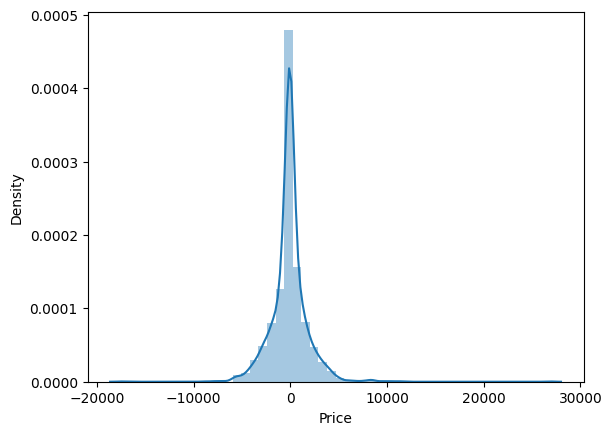

In [161]:
predict(RandomForestRegressor())